In [1]:
import numpy as np
import trace_gen as tg
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
import scipy.stats as ss

In [49]:
def load_trace_w(file):
    w = np.loadtxt(f'/opt/traces/{file}_r.txt', dtype=np.int32)
    w[:, 0] += 7
    w = tg.squash(tg.unroll(w // 8))
    return w

def load_trace_v(file):
    v = np.loadtxt(f'/mnt/sda/alibaba_block_traces_2020/{file}.txt', dtype=np.int64)
    v[:, 0] += 4095
    v = tg.squash(tg.unroll(v // 4096))
    return v

def calculate_error(reference, comparison):
    # Example error metric: Mean Absolute Error (MAE)
    if len(reference) > len(comparison):
        comparison = np.interp(np.linspace(0, 1, len(reference)), np.linspace(0, 1, len(comparison)), comparison)
    else:
        reference = np.interp(np.linspace(0, 1, len(comparison)), np.linspace(0, 1, len(reference)), reference)
    return np.mean(np.abs(reference - comparison))

def plot_mrcs(c, fifos, clocks, names, title, location='upper left'):
    palette = sns.color_palette('dark')
    fig, ax = plt.subplots()

    # Calculate error metrics
    errors_fifo = [0]  # The first one is the reference, so error is 0
    errors_clock = [0]  # The first one is the reference, so error is 0

    for i in range(1, len(fifos)):
        error = calculate_error(fifos[0], fifos[i])
        errors_fifo.append(error)
    
    for i in range(1, len(clocks)):
        error = calculate_error(clocks[0], clocks[i])
        errors_clock.append(error)

    # Plotting original vs reconstructed FIFO
    for i in range(len(fifos)):
        linestyle = '-' if i == 0 else '--'  # Solid line for original, dashed for reconstructed
        label_fifo = names[i] + ' FIFO' if i == 0 else f'{names[i]} FIFO (MAE: {errors_fifo[i]:.2f})'
        ax.plot(c, fifos[i], linestyle, label=label_fifo, linewidth=3, color=palette[0], alpha=0.8)
        
        label_clock = names[i] + ' CLOCK' if i == 0 else f'{names[i]} CLOCK (MAE: {errors_clock[i]:.2f})'
        ax.plot(c, clocks[i], linestyle, label=label_clock, linewidth=3, color=palette[1], alpha=0.8)

    ax.set_xlabel('Normalized Cache size (C)', fontsize=18)
    ax.set_ylabel('Hit rate', fontsize=18)
    ax.legend(loc=location, fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.grid(True)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(True)
    ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))

    plt.show()



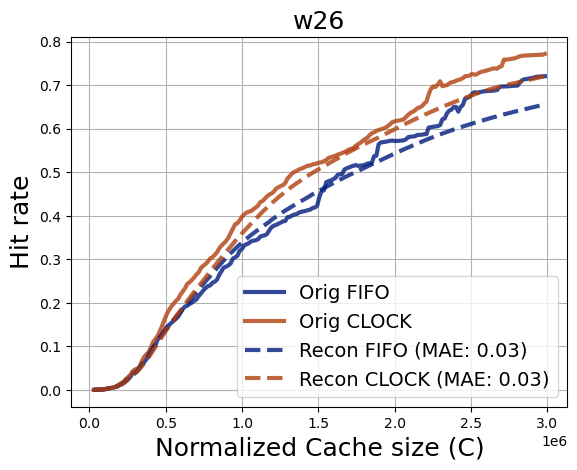

In [50]:
c_26 = np.loadtxt('../data/recon/w26_c.txt', dtype=np.int32)
fifo_26 = np.loadtxt('../data/recon/w26_real_fifo_hr.txt', dtype=np.float32)
clock_26 = np.loadtxt('../data/recon/w26_real_clock_hr.txt', dtype=np.float32)
fifo_recon_26 = np.loadtxt('../data/recon/w26_ird_recon_fifo_hr.txt', dtype=np.float32)
clock_recon_26 = np.loadtxt('../data/recon/w26_ird_recon_clock_hr.txt', dtype=np.float32)
plot_mrcs(c_26, [fifo_26, fifo_recon_26], [clock_26, clock_recon_26], ['Orig', 'Recon'], 'w26', 'lower right')

In [34]:
# c_82 = np.loadtxt('../data/recon/w82_c.txt', dtype=np.int32)
w82 = load_trace_w('w82')
M = len(set(w82))
c_82 = np.linspace(M // 100, M, 199)

fifo_82 = np.loadtxt('../data/recon/w82_real_fifo_hr.txt', dtype=np.float32)
clock_82 = np.loadtxt('../data/recon/w82_real_clock_hr.txt', dtype=np.float32)
fifo_recon_82 = np.loadtxt('../data/recon/w82_ird_recon_fifo_hr.txt', dtype=np.float32)
clock_recon_82 = np.loadtxt('../data/recon/w82_ird_recon_clock_hr.txt', dtype=np.float32)


In [35]:
c_82.shape, fifo_82.shape, clock_82.shape, fifo_recon_82.shape, clock_recon_82.shape

((199,), (199,), (199,), (199,), (199,))

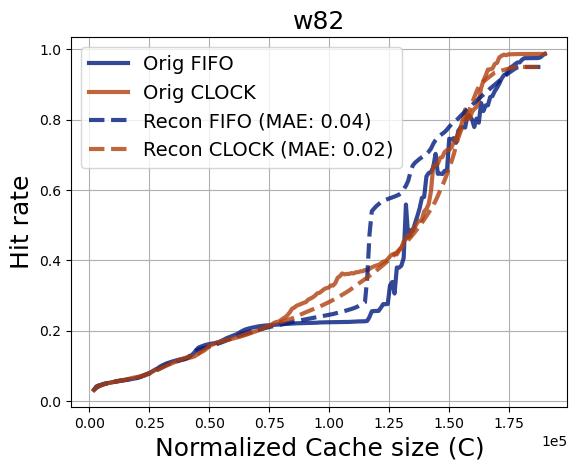

In [51]:
plot_mrcs(c_82, [fifo_82, fifo_recon_82], [clock_82, clock_recon_82], ['Orig', 'Recon'], 'w82')

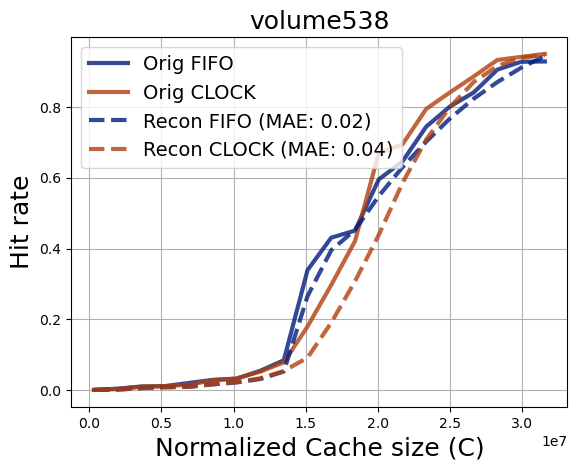

In [54]:
c_538 = np.loadtxt('../data/recon/v538_c.txt', dtype=np.int32)
fifo_538 = np.loadtxt('../data/recon/v538_real_fifo_hr.txt', dtype=np.float32)
clock_538 = np.loadtxt('../data/recon/v538_real_clock_hr.txt', dtype=np.float32)
fifo_recon_538 = np.loadtxt('../data/recon/v538_ird_recon_fifo_hr.txt', dtype=np.float32)
clock_recon_538 = np.loadtxt('../data/recon/v538_ird_recon_clock_hr.txt', dtype=np.float32)
plot_mrcs(c_538, [fifo_538, fifo_recon_538], [clock_538, clock_recon_538], ['Orig', 'Recon'], 'volume538')

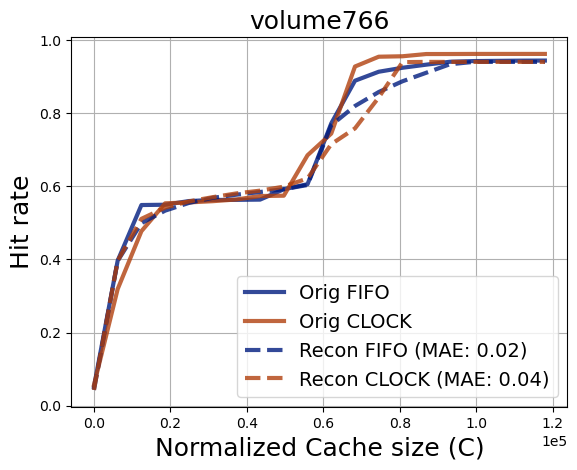

In [55]:
c_766 = np.loadtxt('../data/recon/v766_c.txt', dtype=np.int32)
fifo_766 = np.loadtxt('../data/recon/v766_real_fifo_hr.txt', dtype=np.float32)
clock_766 = np.loadtxt('../data/recon/v766_real_clock_hr.txt', dtype=np.float32)
fifo_recon_766 = np.loadtxt('../data/recon/v766_ird_recon_fifo_hr.txt', dtype=np.float32)
clock_recon_766 = np.loadtxt('../data/recon/v766_ird_recon_clock_hr.txt', dtype=np.float32)
plot_mrcs(c_766, [fifo_766, fifo_recon_766], [clock_766, clock_recon_766], ['Orig', 'Recon'], 'volume766', 'lower right')

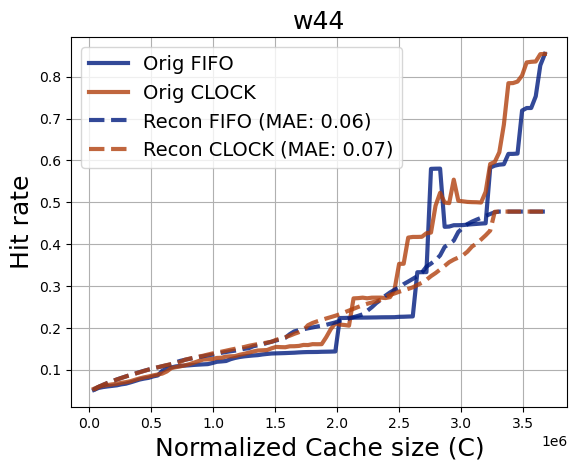

In [57]:
w44 = load_trace_w('w44')
w44_recon = np.loadtxt('../data/recon/w44_ird_recon_trace.txt', dtype=np.int32)

c_44 = np.loadtxt('../data/recon/w44_c.txt', dtype=np.int32)
clock_44 = [tg.sim_clock(c_, w44) for c_ in c_44]
fifo_44 = [tg.sim_fifo(c_, w44) for c_ in c_44]
clock_recon_44 = [tg.sim_clock(c_, w44_recon) for c_ in c_44]
fifo_recon_44 = [tg.sim_fifo(c_,w44_recon) for c_ in c_44]
plot_mrcs(c_44, [fifo_44, fifo_recon_44], [clock_44, clock_recon_44], ['Orig', 'Recon'], 'w44')

In [58]:
np.savetxt('../data/recon/w44_real_fifo_hr.txt', fifo_44, fmt='%.4f')
np.savetxt('../data/recon/w44_real_clock_hr.txt', clock_44, fmt='%.4f')
np.savetxt('../data/recon/w44_ird_recon_fifo_hr.txt', fifo_recon_44, fmt='%.4f')
np.savetxt('../data/recon/w44_ird_recon_clock_hr.txt', clock_recon_44, fmt='%.4f')
